<a href="https://colab.research.google.com/github/GOUTAM-RAM21/C--CODE-PRATICE/blob/main/ILK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as  np

In [2]:
class LinearRegression:
  def __init__(self,lr=0.01,n_iter=1000):
    self.bias=None
    self.weights=None
    self.lr=lr
    self.n_iter=n_iter


    def fit(self,X,y):
      m,n=X.shape

      #STEP1
      self.bias=0;
      self.weights=np.zeros(n)
# Gradient Desent
      #STEP2
    for i in range(self.n_iter):

      y_pred=self.bias+np.dot(X,self.weights)


       #STEP3
      dp=(1/m)*np.sum(y_pred-y)
      dw=(1/m)*np.dot(X.T,(y_pred-y))

      #step4
      self.bias-=self.lr*dp
      self.weights-=self.lr*dw

    def predict(self,X):
      y_pred=self.bias+np.dot(X,self.weights)
      return y_pred

In [4]:
import numpy as np

class LinearRegression:
  def __init__(self,lr=0.01,n_iter=1000):
    self.bias=None
    self.weights=None
    self.lr=lr
    self.n_iter=n_iter

  def fit(self,X,y):
    m,n=X.shape

    #STEP1
    self.bias=0;
    self.weights=np.zeros(n)
    # Gradient Desent
    #STEP2
    for i in range(self.n_iter):
      y_pred=self.bias+np.dot(X,self.weights)

      #STEP3
      dp=(1/m)*np.sum(y_pred-y)
      dw=(1/m)*np.dot(X.T,(y_pred-y))

      #step4
      self.bias-=self.lr*dp
      self.weights-=self.lr*dw

  def predict(self,X):
    y_pred=self.bias+np.dot(X,self.weights)
    return y_pred

X=np.array([[1],[2],[3],[4],[5]])
y=np.array([2,4,6,8,10])

model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
print(y_pred)

[2.06850809 4.04226297 6.01601785 7.98977273 9.96352761]


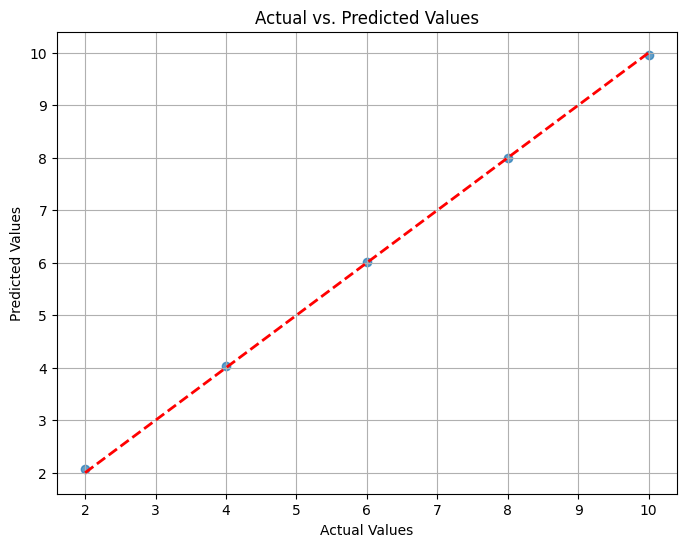

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

In [12]:
import numpy as np # Import numpy as it's used

class LinearRegressionOLS:
  def __init__(self):
    self.bias=None
    self.weights=None

  def fit(self, X, y):
    m, n = X.shape
    # Add a column of ones for the bias term
    X_b = np.c_[np.ones((m, 1)), X]

    # Calculate theta (weights and bias) using the OLS formula
    # theta = (X_b.T @ X_b)^-1 @ X_b.T @ y
    # Ensure matrix multiplication is used, np.dot is fine but @ is more explicit for matrices
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    self.bias = theta[0]
    self.weights = theta[1:]

  def predict(self, X):
    # Ensure predict also takes X as an argument
    y_pred = self.bias + np.dot(X, self.weights)
    return y_pred


# Example usage:
X=np.array([[1],[2],[3],[4],[5]])
y=np.array([2,4,6,8,10])

# Instantiate the OLS model
model=LinearRegressionOLS()
model.fit(X,y)
y_pred=model.predict(X)
print(y_pred)
print(model.bias)
print(model.weights)


[ 2.  4.  6.  8. 10.]
5.662137425588298e-15
[2.]


In [15]:
import numpy as np
class LogisticRegression:
  def __init__(self,lr=0.1,n_iter=1000):
    self.bias=None
    self.weights=None
    self.lr=lr
    self.n_iter=n_iter

  def _sigmoid(self, z):
    return(1/(1+np.exp(-z)))

  def fit(self,X,y):
    m,n=X.shape
    self.bias=0
    self.weights=np.zeros(n)
    for i in range(self.n_iter):
      z=self.bias+np.dot(X,self.weights)
      y_pred=self._sigmoid(z)
      db=(1/m)*np.sum(y_pred-y)
      dw=(1/m)*np.dot(X.T,(y_pred-y))

      self.bias-=self.lr*db
      self.weights-=self.lr*dw

  def get_probability(self,x):
    z=self.bias+np.dot(x,self.weights)
    return self._sigmoid(z)

  def predict(self,X,threshold=0.5):
    probabilities=self.get_probability(X)
    y_pred_bool=probabilities>=threshold
    return y_pred_bool.astype(int)

In [20]:
X=np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
y=np.array([0,0,0,1,1])

model=LogisticRegression()
model.fit(X,y)
y_pred=model.predict(X)
print(y_pred)
print(model.bias)
print(model.weights)
print(model.get_probability(X))

[0 0 0 1 1]
-4.939505917232351
[ 3.4212929  -1.51821301]
[0.01040881 0.06589298 0.32115275 0.76035024 0.95511296]


In [37]:
import numpy as np
class KNNClassfier:
  def __init__(self,k=3):
    self.k=k
    self.X_train = None
    self.y_train = None

  def _euclidean_distance(self,x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

  def fit(self,X,y): #lazer learner
    self.X_train=X
    self.y_train=y

  def predict_one(self,x):
    distances=[self._euclidean_distance(x_train_point,x) for x_train_point in self.X_train]
    knn=np.argsort(distances)[:self.k]
    knn_classes=[self.y_train[i] for i in knn]
    majority=np.bincount(knn_classes).argmax()
    return majority

  def predict(self,X):
    y_pred=[self.predict_one(x) for x in X]
    return y_pred

In [32]:
knn=[0,0,1,1,0,0,3,3,5]
np.argmax=np.bincount(knn)

In [33]:
x1=np.array([1,2])
x2=np.array([3,4])
np.sqrt(np.sum((x1-x2)**2))

np.float64(2.8284271247461903)

[np.int64(0), np.int64(1)]


<Axes: xlabel='x1', ylabel='x2'>

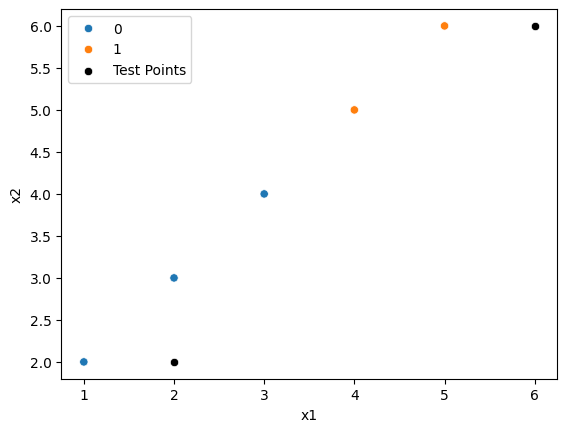

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns

x_train =np.array([[1,2],[2,3],[3,4],[4,5],[5,6]])
y_train=np.array([0,0,0,1,1,])
x_test=np.array([[2,2],[6,6]])

model=KNNClassfier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print(y_pred)
x_train_df=pd.DataFrame(x_train,columns=['x1','x2'])
x_train_df["label"]=y_train

x_test_df=pd.DataFrame(x_test,columns=['x1','x2']) # Define x_test_df

sns.scatterplot(data=x_train_df,x="x1",y="x2", hue="label")
sns.scatterplot(data=x_test_df,x="x1",y="x2",color="black",label="Test Points") # Corrected keyword argument